<h1><font color=blue><b>Indian Road Safety Campaign ML Internship Submission - Satakshi Dubey</b></font></h1>

> <font color=blue>Find the two datasets attached with the mail. One dataset represents the x and y axis accelerations recorded by phone accelerometer for the case when a phone falls on the ground. The other dataset represent the x and y axis acceleration recorded by phone accelerometer when it is in a car which experiences a crash.</font>

<h1><font color=blue><b>Problem Statement 1 : (15 points)</b></font></h1>

> <font color=red>Make a predictive tool which takes into account two inputs, i.e. x and y axis accelerations. The tool should be able to determine whether the phone has fallen or it is a car accident.</font>

***

> <font color=blue>Notes -</font> 
There can be a false alarm in cases when phone is thrown for some reason.

**Initial Observations -** 

> Fall - 
1. Y coordinate shows greater change, little changes in x-coordinate wrt time.
2. As in any phone fall case, there is a reduction in Y coordinate alongwith a little increase afterwards and 
then reduction
in values which signifies the bounce back after hitting the surface.

> Crash - 
1. Significant changes in both X and Y coordinates wrt time.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Importing Data

In [2]:
fall_data = pd.read_excel('PHONE FALL DATA FILE.xls')
crash_data = pd.read_excel('ACCIDENTAL DATA FILE.xlsx')

### Fall Data

In [3]:
fall_data.head()

,ACTUAL TIME (ms),TIME INTERVAL (ms),Accel X,Accel Y
0,0,0,-3.237152,2.039383
1,8,8,-3.347595,1.998138
2,12,4,-3.489105,1.942612
3,15,3,-3.608948,1.878632
4,23,8,-3.689438,1.838272


In [4]:
len(fall_data)

2499

In [5]:
fall_data.columns = ['actual_time(ms)', 'time_interval(ms)', 'acc_x', 'acc_y']
fall_data['activity'] = 0 #"phone_fall"
fall_data.head(2)

,actual_time(ms),time_interval(ms),acc_x,acc_y,activity
0,0,0,-3.237152,2.039383,0
1,8,8,-3.347595,1.998138,0


In [6]:
fall_copy = fall_data.copy()

### Crash Data

In [7]:
crash_data.head()

,MS,X,Y
0,2,-9.8,2.2
1,4,-7.8,0.2
2,6,-7.8,1.8
3,8,-5.8,2.6
4,10,-4.6,1.0


In [8]:
len(crash_data)

176

In [9]:
crash_data.columns = ['actual_time(ms)', 'acc_x', 'acc_y']
crash_data['activity'] = 1 #"accident"
crash_data.head(2)

,actual_time(ms),acc_x,acc_y,activity
0,2,-9.8,2.2,1
1,4,-7.8,0.2,1


In [10]:
crash_copy = crash_data.copy()

## Exploratory Data Analysis

In [11]:
fall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 5 columns):
actual_time(ms)      2499 non-null int64
time_interval(ms)    2499 non-null int64
acc_x                2499 non-null float64
acc_y                2499 non-null float64
activity             2499 non-null int64
dtypes: float64(2), int64(3)
memory usage: 97.7 KB


In [12]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
actual_time(ms)    176 non-null int64
acc_x              176 non-null float64
acc_y              176 non-null float64
activity           176 non-null int64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB


In [13]:
fall_data.describe()

,actual_time(ms),time_interval(ms),acc_x,acc_y,activity
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.0
mean,6295.210884,5.033613,-0.189067,4.559166,0.0
std,3631.780964,5.941912,1.116397,0.631814,0.0
min,0.000000,0.000000,-5.934784,1.420105,0.0
25%,3148.000000,3.000000,-0.429848,4.402466,0.0
50%,6291.000000,4.000000,0.270737,4.689087,0.0
75%,9437.000000,7.000000,0.490509,4.919045,0.0
max,12579.000000,97.000000,1.171417,6.119110,0.0


In [14]:
crash_data.describe()

,actual_time(ms),acc_x,acc_y,activity
count,176.000000,176.000000,176.000000,176.0
mean,147.159091,-2.825568,0.146591,1.0
std,85.729793,4.652652,4.566022,0.0
min,0.000000,-17.800000,-8.000000,1.0
25%,73.500000,-3.850000,-0.500000,1.0
50%,147.000000,-0.200000,-0.200000,1.0
75%,220.000000,-0.200000,0.200000,1.0
max,300.000000,5.500000,44.000000,1.0


### Distribution PLot

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


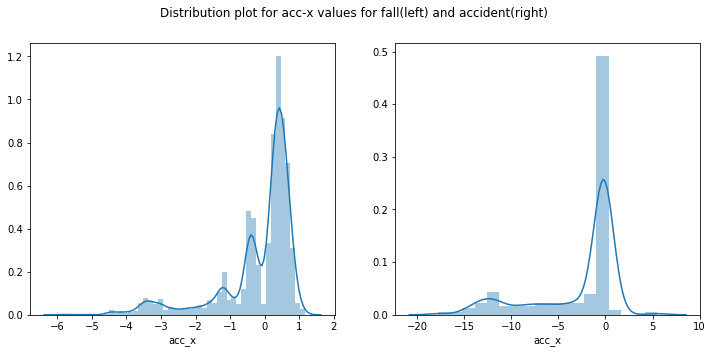

In [15]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Distribution plot for acc-x values for fall(left) and accident(right)")
sns.distplot(fall_data['acc_x'], ax=ax[0])
sns.distplot(crash_data['acc_x'], ax=ax[1])
fig.show()

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


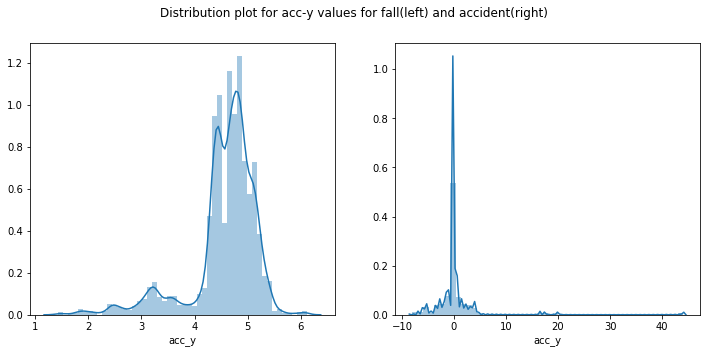

In [16]:
graph, ax =plt.subplots(1,2,figsize=(12,5))
graph.suptitle("Distribution plot for acc-y values for fall(left) and accident(right)")
sns.distplot(fall_data['acc_y'], ax=ax[0])
sns.distplot(crash_data['acc_y'], ax=ax[1])
graph.show()

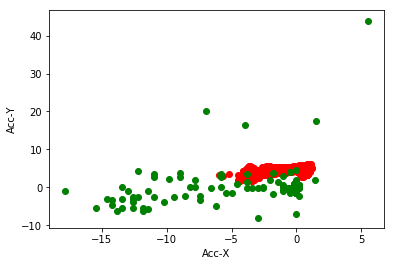

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(fall_data.acc_x, fall_data.acc_y, color='r')
plt.scatter(crash_data.acc_x, crash_data.acc_y, color='g')
plt.xlabel('Acc-X')
plt.ylabel('Acc-Y')
plt.show()

### Function to plot x and y axis accelerations

In [18]:
def plot_activity(scene, df):
    data = df[['acc_x', 'acc_y']]
    axis = data.plot(subplots=True, title=scene)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

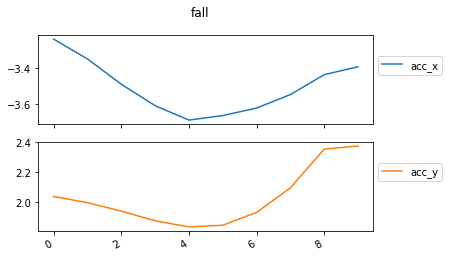

In [19]:
plot_activity("fall", fall_data[:10])

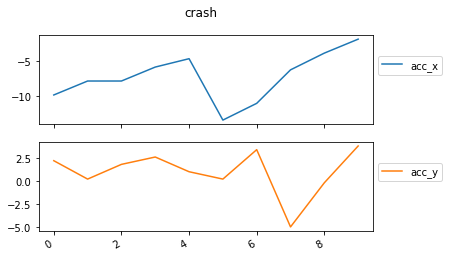

In [20]:
plot_activity("crash", crash_data[:10])

### Observations -

> 1. Even with 10 data points, we witness that there are abrupt and large changes signified by sharp edges in the graph for the "Acident/Crash" data whereas the "Phone Fall" has a smoother curve.

> 2. Even the scale is of greater magnitude for the "Accident/Crash" as compared to the "Phone Fall" dataset which signifies that in an event of crash the acceleration values observed are abrupt and more.

***

## Data preparation - merging data 

In [21]:
#pickup only acc-x, acc-y and activity columns from both the dataframes and merge them into one
fall_copy = fall_copy.drop(['actual_time(ms)', 'time_interval(ms)'], axis=1)
fall_copy.head(2)

,acc_x,acc_y,activity
0,-3.237152,2.039383,0
1,-3.347595,1.998138,0


In [22]:
crash_copy = crash_copy.drop(['actual_time(ms)'], axis=1)
crash_copy.head(2)

,acc_x,acc_y,activity
0,-9.8,2.2,1
1,-7.8,0.2,1


In [23]:
df = pd.concat([fall_copy, crash_copy])
df.head()

,acc_x,acc_y,activity
0,-3.237152,2.039383,0
1,-3.347595,1.998138,0
2,-3.489105,1.942612,0
3,-3.608948,1.878632,0
4,-3.689438,1.838272,0


In [24]:
len(df)

2675

In [25]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

In [26]:
X

array([[-3.237152 ,  2.039383 ],
       [-3.3475952,  1.9981384],
       [-3.4891052,  1.9426117],
       ...,
       [ 0.       , -1.5      ],
       [ 0.       , -1.5      ],
       [ 0.       , -1.5      ]])

In [27]:
y

array([0, 0, 0, ..., 1, 1, 1])

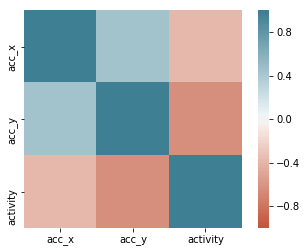

In [28]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

> From the correlation matrix, it is evident that the acc_y is strongly and negatively correlated with "activity" and thus is the dominant factor in determining "activity".

***

<h1><font color=blue><b>Classification Algorithms</b></font></h1>

<h3><font color=red><b>Decision Tree Classifier</b></font></h3>

In [29]:
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
decision_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_classifier.fit(X_dtrain, y_dtrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
y_dpred = decision_classifier.predict(X_dtest)

In [32]:
cmd = confusion_matrix(y_dtest, y_dpred)
print("Confusion Matrix - ")
cmd

Confusion Matrix - 


array([[618,   2],
       [  3,  46]])

In [33]:
print("---Accuracy for Decision Tree Classification---")
print(round(accuracy_score(y_dtest, y_dpred),4)*100)

---Accuracy for Decision Tree Classification---
99.25


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


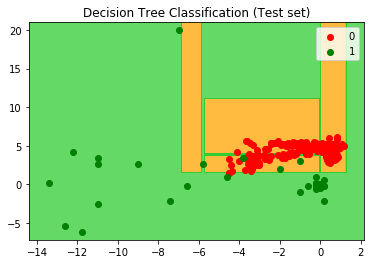

In [34]:
X_set, y_set = X_dtest, y_dtest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, decision_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Decision Tree Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>Decision Tree Classifier Observations -</b></font></h3> 

> While the decision tree classifier shows an impressive **accuracy of 99.25%,** it is somehow overfitted to the data as we can see in the graph from the decision boundaries. Nevertheless, we shall be doing similar experimentation with various other algorithms and then do a comparative analysis.

***

<h3><font color=red><b>KNN Classifier</b></font></h3> 

In [35]:
X_ktrain, X_ktest, y_ktrain, y_ktest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_ktrain, y_ktrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
y_kpred = knn_classifier.predict(X_ktest)

In [38]:
cmk = confusion_matrix(y_ktest, y_kpred)
print("Confusion Matrix - ")
cmk

Confusion Matrix - 


array([[620,   0],
       [  6,  43]])

In [39]:
print("---Accuracy for KNN Classification---")
print(round(accuracy_score(y_ktest, y_kpred),4)*100)

---Accuracy for KNN Classification---
99.1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


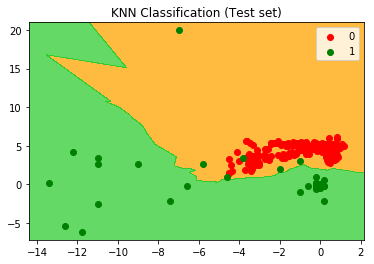

In [40]:
X_set, y_set = X_ktest, y_ktest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('KNN Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>KNN Classifier Observations -</b></font></h3> 

> The decision boundaries for KNN classifier are far better and less overfitted than the decision tree classifier; still it remaines somewhat tightly fitted to the data. It gives an **accuracy of 99.1%.**

***

<h3><font color=red><b>Kernel SVM Classifier</b></font></h3> 

In [41]:
X_kstrain, X_kstest, y_kstrain, y_kstest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [42]:
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(X_kstrain, y_kstrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_kspred = ksvm_classifier.predict(X_kstest)

In [44]:
cmks = confusion_matrix(y_kstest, y_kspred)
print("Confusion Matrix - ")
cmks

Confusion Matrix - 


array([[620,   0],
       [  4,  45]])

In [45]:
print("---Accuracy for Kernel SVM Classification---")
print(round(accuracy_score(y_kstest, y_kspred),4)*100)

---Accuracy for Kernel SVM Classification---
99.4


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


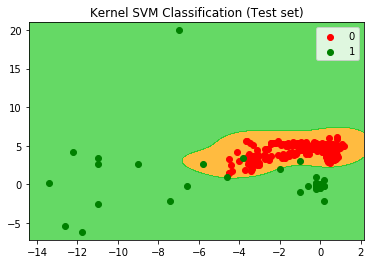

In [46]:
X_set, y_set = X_kstest, y_kstest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ksvm_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>Kernel SVM Classifier Observations -</b></font></h3> 

> The decision boundary for the Kernel SVM is particularly precise and intuitive in this case because one of the classes can be sharply distinguished from the other using RBF kernel. It gives an **accuracy of 99.4%**.

***

<h3><font color=red><b>Logistic Regression Classifier</b></font></h3>

In [47]:
X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(X_ltrain, y_ltrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_lpred = logistic_classifier.predict(X_ltest)

In [50]:
cml = confusion_matrix(y_ltest, y_lpred)
print("Confusion Matrix - ")
cml

Confusion Matrix - 


array([[620,   0],
       [ 10,  39]])

In [51]:
print("---Accuracy for Kernel SVM Classification---")
print(round(accuracy_score(y_ltest, y_lpred),4)*100)

---Accuracy for Kernel SVM Classification---
98.50999999999999


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


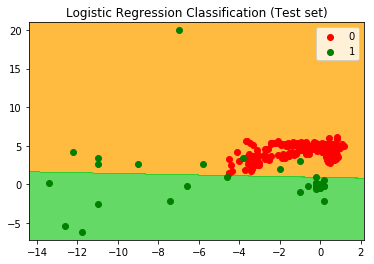

In [52]:
X_set, y_set = X_ltest, y_ltest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>Logistic Regression Classifier Observations -</b></font></h3> 

> While the Logistic Regression gives a decent **accuracy of 98.5%,** what it produces is a very raw decision boundary. This kind of decision boundary will fail to accommodate future data points.

***

<h3><font color=red><b>Naive Bayes Classifier</b></font></h3>

In [53]:
X_nbtrain, X_nbtest, y_nbtrain, y_nbtest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_nbtrain, y_nbtrain)

GaussianNB(priors=None)

In [55]:
y_nbpred = bayes_classifier.predict(X_nbtest)

In [56]:
cmnb = confusion_matrix(y_nbtest, y_nbpred)
print("Confusion Matrix - ")
cmnb

Confusion Matrix - 


array([[597,  23],
       [  1,  48]])

In [57]:
print("---Accuracy for Naive Bayes Classification---")
print(round(accuracy_score(y_nbtest, y_nbpred),4)*100)

---Accuracy for Naive Bayes Classification---
96.41


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


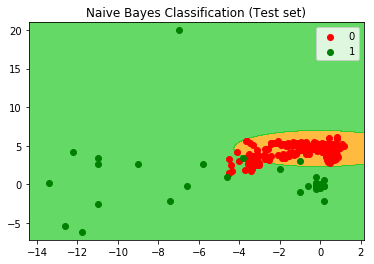

In [58]:
X_set, y_set = X_nbtest, y_nbtest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, bayes_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>Naive Bayes Classifier Observations -</b></font></h3> 

> The naive bayes classifier gives **accuracy of 96.4%,**. Although it tries to dra decision boundary similar to that of the kernel SVM but it does not fits that well.

***

<h3><font color=red><b>Random Forest Classifier</b></font></h3>

In [59]:
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_rftrain, y_rftrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
y_rfpred = rf_classifier.predict(X_rftest)

In [62]:
cmrf = confusion_matrix(y_rftest, y_rfpred)
print("Confusion Matrix - ")
cmrf

Confusion Matrix - 


array([[618,   2],
       [  4,  45]])

In [63]:
print("---Accuracy for Random Forest Classification---")
print(round(accuracy_score(y_rftest, y_rfpred),4)*100)

---Accuracy for Random Forest Classification---
99.1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


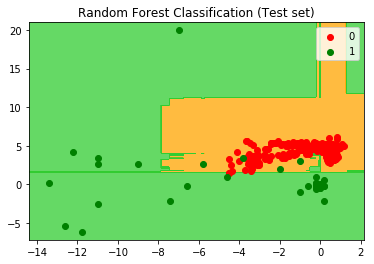

In [64]:
X_set, y_set = X_rftest, y_rftest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Random Forest Classification (Test set)')
plt.legend()
plt.show()

<h3><font color=red><b>Random Forest Classifier Observations -</b></font></h3> 

> The random forest classifier gives an **accuracy of 99.1%.** While it tries to better the decision boundary than the decision tree classifier, it still is not good enough for our purpose.

> **Kernel SVM seems to be the best solution here for classifying phone fall and accident cases due to its not so overfitting and precise decision boundary and high accuracy.**

***

<h2><font color=blue><b>Bonus Problem statement : (10 points)</b></font></h2>
<h3><font size=3px>Make the predictive tool as such it learns with the new sets of data encountered in phone fall situation or accidental situation -- <p>This is the case of <i>ONLINE LEARNING(iterative supervised learning) or BATCH LEARNING!</p></i></font></h3>

> This can be done in two ways. 

- Each time a new observation is available, you use this single data point to further train your model. This might be useful in situations where your model needs to dynamically adapt to new patterns in data. 

- In batch training, we wait until we have a batch of **n new observations and then train your already existing model on this whole batch**.

<img src="https://user-images.githubusercontent.com/26996041/39611189-d019a09c-4f90-11e8-853c-75d6ef24bc02.gif">

### SGD Classifier - calculates the error and updates the model for each example in the training dataset.

In [65]:
X_sgdtrain, X_sgdtest, y_sgdtrain, y_sgdtest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
sgd_classifier = SGDClassifier()

In [68]:
sgd_classifier.fit(X_sgdtrain, y_sgdtrain)

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [69]:
y_sgdpred = sgd_classifier.predict(X_sgdtest)

In [70]:
cmsgd = confusion_matrix(y_sgdtest, y_sgdpred)
print("Confusion Matrix - ")
cmsgd

Confusion Matrix - 


array([[620,   0],
       [ 14,  35]])

In [71]:
print("---Accuracy for SGD Classification---")
print(round(accuracy_score(y_sgdtest, y_sgdpred),4)*100)

---Accuracy for SGD Classification---
97.91


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


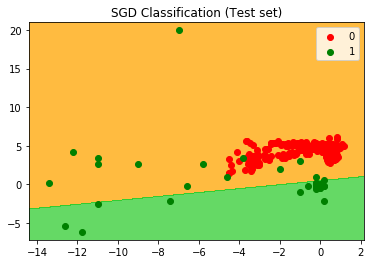

In [73]:
X_set, y_set = X_sgdtest, y_sgdtest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, sgd_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SGD Classification (Test set)')
plt.legend()
plt.show()

> The SGDClassifier or Stochastic Gradient Descent classifier calculates the error and updates the model for each example in the training dataset. Therefore, with each new data point encountered in phone fall situation or accidental situation, the SGD model is retrained and updated thus facilitating **"Incremental Learning". It gives an accuracy of 97.91%.**

***

<h3><font color=red><b>LSTM for time-series analysis</b></font></h3>

> If we want to take into account a series of values over time and prevent successive values, we can try a time series classification for the given data. "df" dataframe is the merged dataframe. 

In [74]:
# LSTM expects fixed-length sequences
N_TIME_STEPS = 107

N_FEATURES = 2
step = 20
segments = []
labels = []

for i in range(0, len(df) - N_TIME_STEPS, step):
    
    xs = df['acc_x'].values[i: i + N_TIME_STEPS]
    ys = df['acc_y'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    
    segments.append([xs, ys])
    labels.append(label)

In [75]:
np.array(segments).shape

(129, 2, 107)

In [76]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [77]:
reshaped_segments.shape

(129, 107, 2)

In [78]:
X_lstmtrain, X_lstmtest, y_lstmtrain, y_lstmtest = train_test_split(reshaped_segments, labels, test_size=0.2, 
                                                    random_state=2)

<h3><font color=red><b>LSTM model</b></font></h3>

In [79]:
N_CLASSES = 2
N_HIDDEN_UNITS = 16

def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [80]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [81]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [82]:
L2_LOSS = 0.0015
l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [83]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [84]:
N_EPOCHS = 50
BATCH_SIZE = 16
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_lstmtrain)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_lstmtrain[start:end],
                                       Y: y_lstmtrain[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_lstmtrain, Y: y_lstmtrain})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_lstmtest, Y: y_lstmtest})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_lstmtest, Y: y_lstmtest})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

epoch: 1 test accuracy: 0.9615384340286255 loss: 0.24205158650875092
epoch: 10 test accuracy: 1.0 loss: 0.12755045294761658
epoch: 20 test accuracy: 1.0 loss: 0.11367549002170563
epoch: 30 test accuracy: 1.0 loss: 0.10389130562543869
epoch: 40 test accuracy: 1.0 loss: 0.09592045098543167
epoch: 50 test accuracy: 1.0 loss: 0.08913134783506393

final results: accuracy: 1.0 loss: 0.08913134783506393


> LSTMs are tricky to train, it already gives an accuracy of 100% which maybe subjected to overfitting due to the fact that the data available for training is less diverse and not enough. The loss gets on decreasing. Until or unless we have large data for both the cases we cannot determine how effective LSTMs can be in modelling the data.

## Thank You!